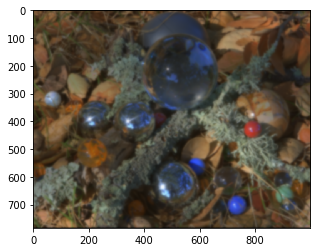

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from Source.implisitt import implisitt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve


file= '../hdr-bilder/Balls/Balls_00032.png'
u=imageio.imread(file)
#u = np.sum(u.astype(float),2) /(3*255)   # konverter til gråtone
u = u.astype(float) / 255
u[u<0]=0
u[u>1]=1

image = implisitt(u,n=3, alpha=2,rgb=True)
plt.figure()
plt.imshow(image)
plt.show()